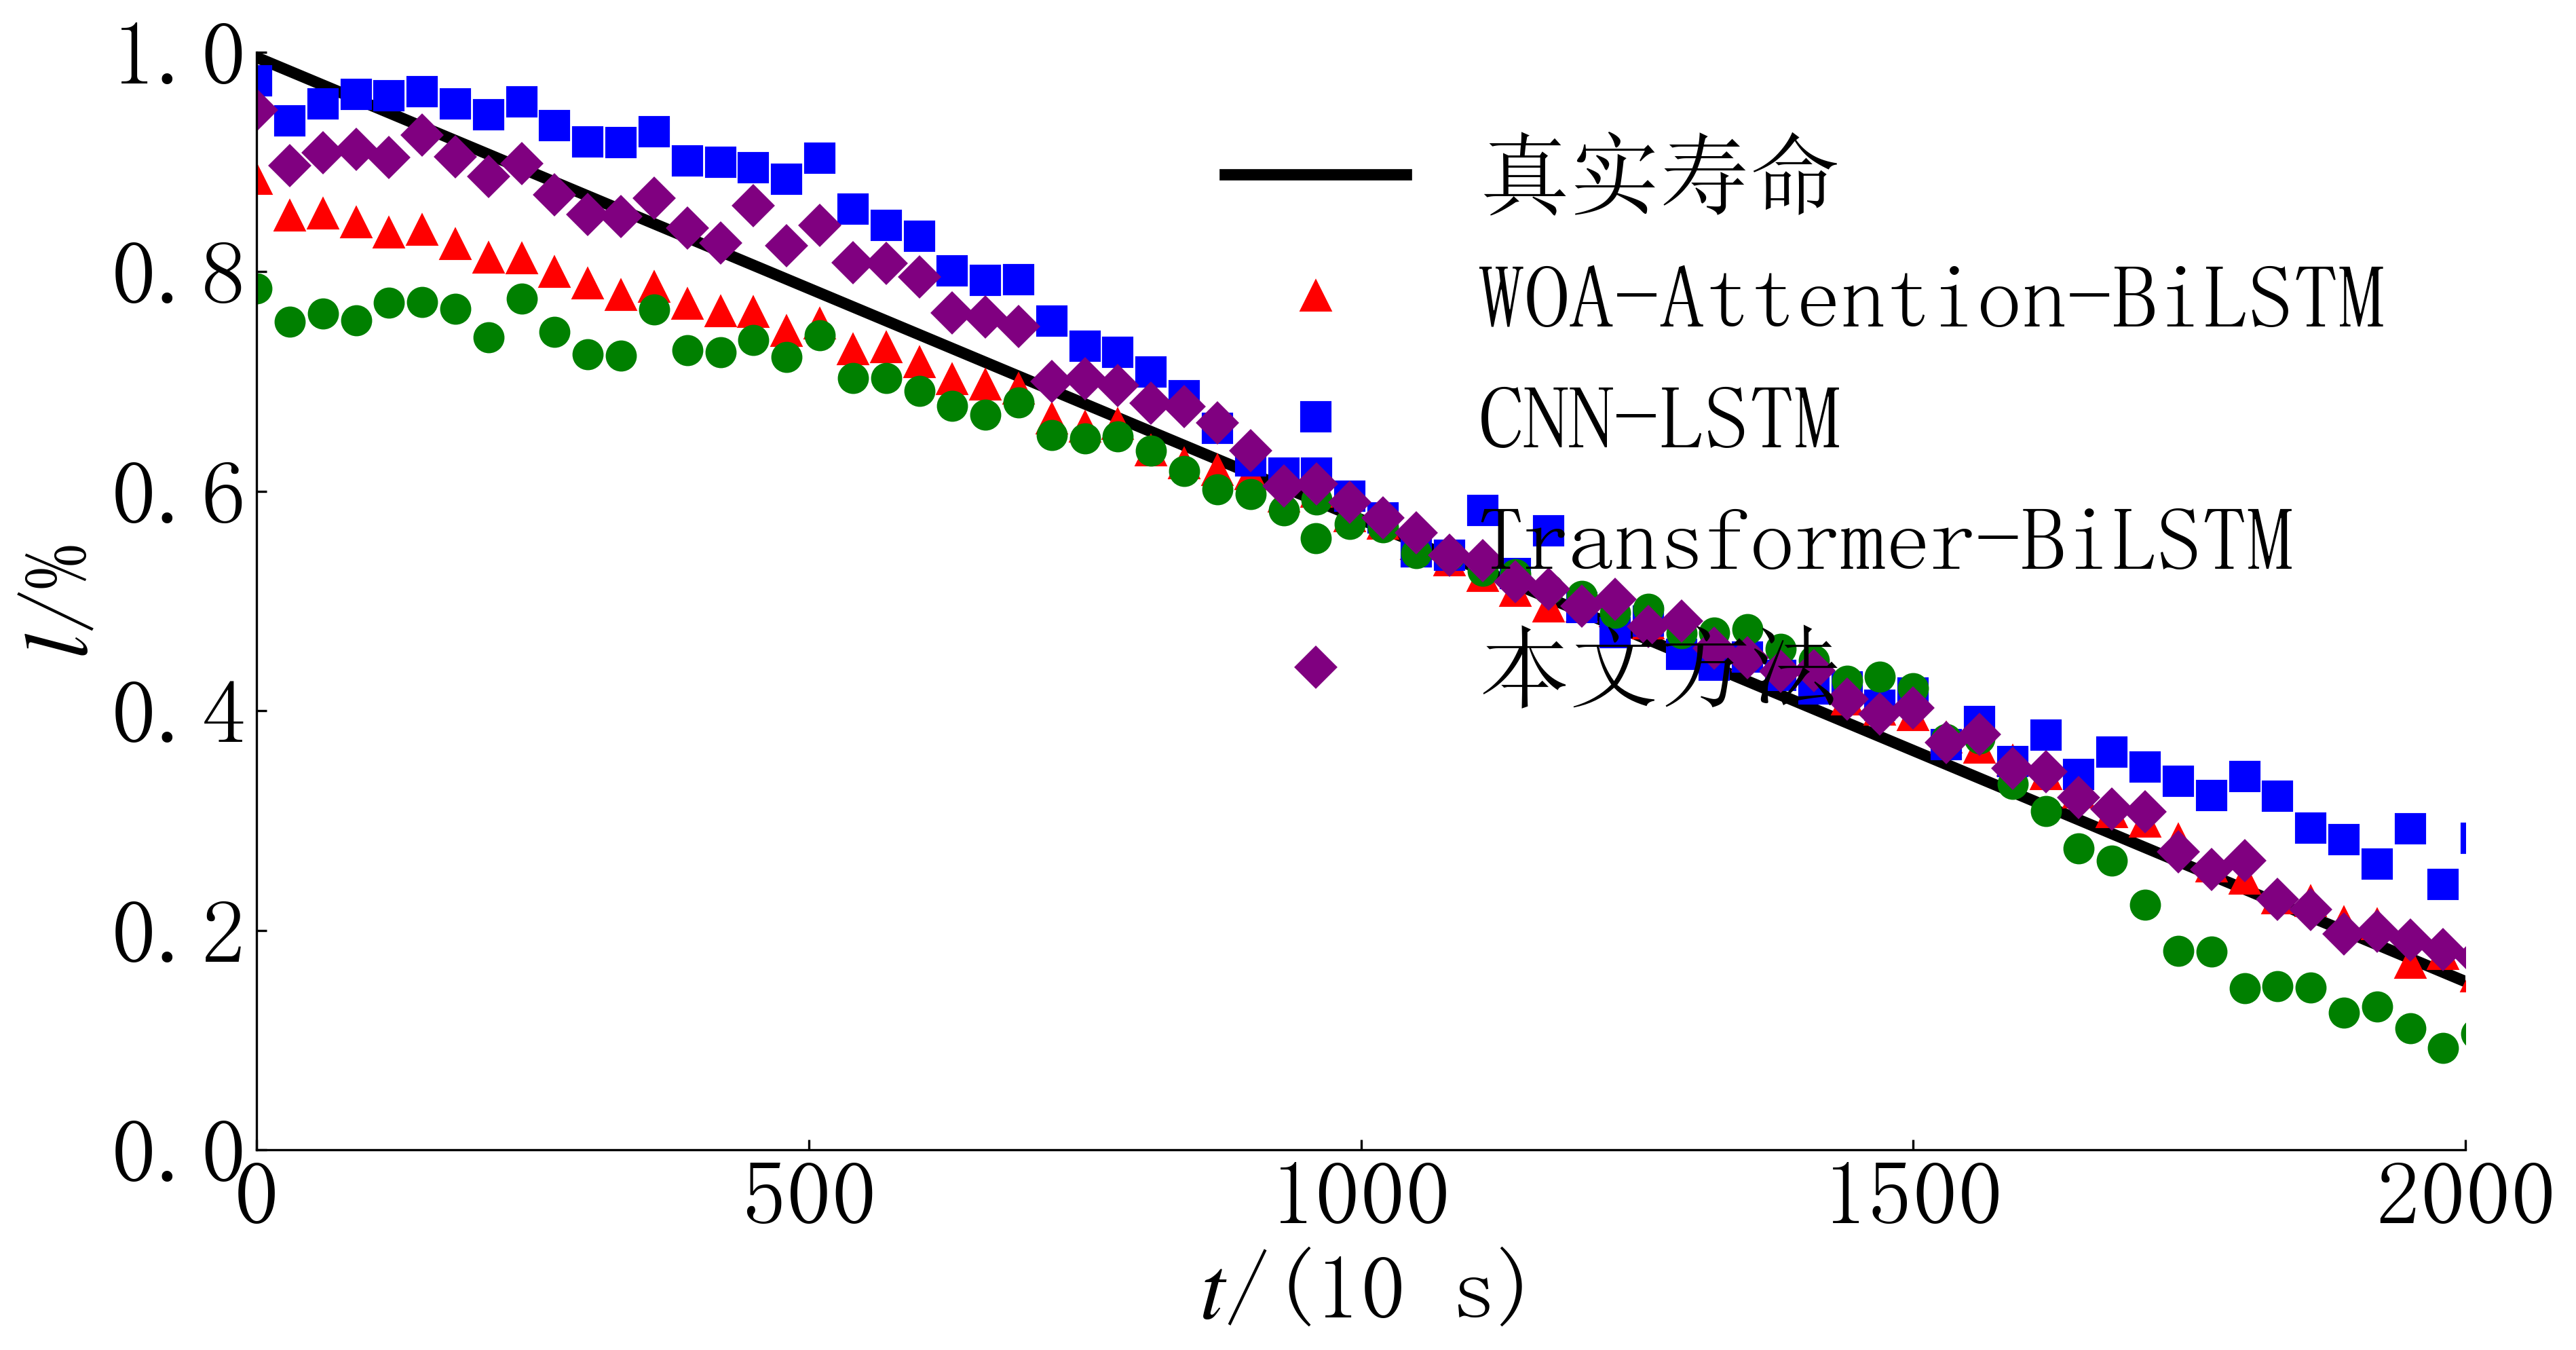

In [17]:
# %%
from joblib import load
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# 设置字体
plt.rcParams['font.family'] = ['SimSun', 'Times New Roman']  # 中文用宋体，英文用Times New Roman
plt.rcParams['font.size'] = 32  # 全局字体大小
plt.rcParams['legend.fontsize'] = 32  # 图例字体大小
# 特别设置数学字体为Times New Roman
plt.rcParams['mathtext.fontset'] = 'stix'  # 使用与Times New Roman兼容的数学字体

# 加载数据
cnn_origin = load('cnn_origin')
tcn_origin = load('tcn_origin')
tcn_pre = load('tcn_pre')
cnn_lstm_origin = load('cnn_lstm_origin')
cnn_lstm_pre = load('cnn_lstm_pre')
transformer_bilstm_serial_origin = load('transformer_bilstm_serial_origin')
transformer_bilstm_serial_pre = load('transformer_bilstm_serial_pre')
CNN_GGCA_transform_BFM_origin = load('cnn_transformer_origin')
CNN_GGCA_transform_BFM_pre = load('cnn_transformer_pre')

# 创建图像
plt.figure(figsize=(14, 7), dpi=300)

# 绘制各模型预测结果，基准线使用黑色实线，其他结果只使用标记点
plt.plot(cnn_origin, label='真实寿命', color='black', linewidth=4, linestyle='-')
plt.plot(tcn_pre, label='WOA-Attention-BiLSTM', color='red', linewidth=0, linestyle='', marker='^', markersize=10, markevery=30)
plt.plot(cnn_lstm_pre, label='CNN-LSTM', color='blue', linewidth=0, linestyle='', marker='s', markersize=10, markevery=30)
plt.plot(transformer_bilstm_serial_pre, label='Transformer-BiLSTM', color='green', linewidth=0, linestyle='', marker='o', markersize=10, markevery=30)
plt.plot(CNN_GGCA_transform_BFM_pre, label='本文方法', color='purple', linewidth=0, linestyle='', marker='D', markersize=10, markevery=30)

# 设置坐标轴标签（变量使用斜体）
plt.xlabel('$t$/(10 s)', fontsize=32)
plt.ylabel('$l$/%', fontsize=32)

# 设置坐标轴范围
plt.xlim(0, 2000)
plt.ylim(0, 1.0)

# 设置刻度
plt.xticks([0, 500, 1000, 1500, 2000])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

# 设置刻度线朝内
plt.tick_params(axis='both', direction='in', which='both')

# 移除图表边框
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

# 设置图例无边框
plt.legend(frameon=False, loc='upper right')

# 保存图像
plt.savefig('对比实验对比图.png', bbox_inches='tight')
plt.savefig('对比实验对比图_灰度.png', bbox_inches='tight')  # 额外保存一个灰度版本
plt.show()